In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
banknote_datadset = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [ ]:
banknote_datadset.describe

<bound method NDFrame.describe of           VWTI     SWTI      CWTI        EI  Class
0     2.263400  -4.4862   3.65580 -0.612510      0
1     3.271800   1.7837   2.11610  0.613340      0
2    -3.941100 -12.8792  13.05970 -3.312500      1
3     0.519500  -3.2633   3.08950 -0.984900      0
4     2.569800  -4.4076   5.98560  0.078002      0
...        ...      ...       ...       ...    ...
1091  1.640600   3.5488   1.39640 -0.364240      0
1092 -0.048008  -1.6037   8.47560  0.755580      0
1093  2.942100   7.4101  -0.97709 -0.884060      0
1094  1.964700   6.9383   0.57722  0.663770      0
1095 -0.126240  10.3216  -3.71210 -6.118500      0

[1096 rows x 5 columns]>

In [ ]:
banknote_datadset.head

<bound method NDFrame.head of           VWTI     SWTI      CWTI        EI  Class
0     2.263400  -4.4862   3.65580 -0.612510      0
1     3.271800   1.7837   2.11610  0.613340      0
2    -3.941100 -12.8792  13.05970 -3.312500      1
3     0.519500  -3.2633   3.08950 -0.984900      0
4     2.569800  -4.4076   5.98560  0.078002      0
...        ...      ...       ...       ...    ...
1091  1.640600   3.5488   1.39640 -0.364240      0
1092 -0.048008  -1.6037   8.47560  0.755580      0
1093  2.942100   7.4101  -0.97709 -0.884060      0
1094  1.964700   6.9383   0.57722  0.663770      0
1095 -0.126240  10.3216  -3.71210 -6.118500      0

[1096 rows x 5 columns]>

In [ ]:
for col in banknote_datadset.columns: 
    print(col)

VWTI
SWTI
CWTI
EI
Class


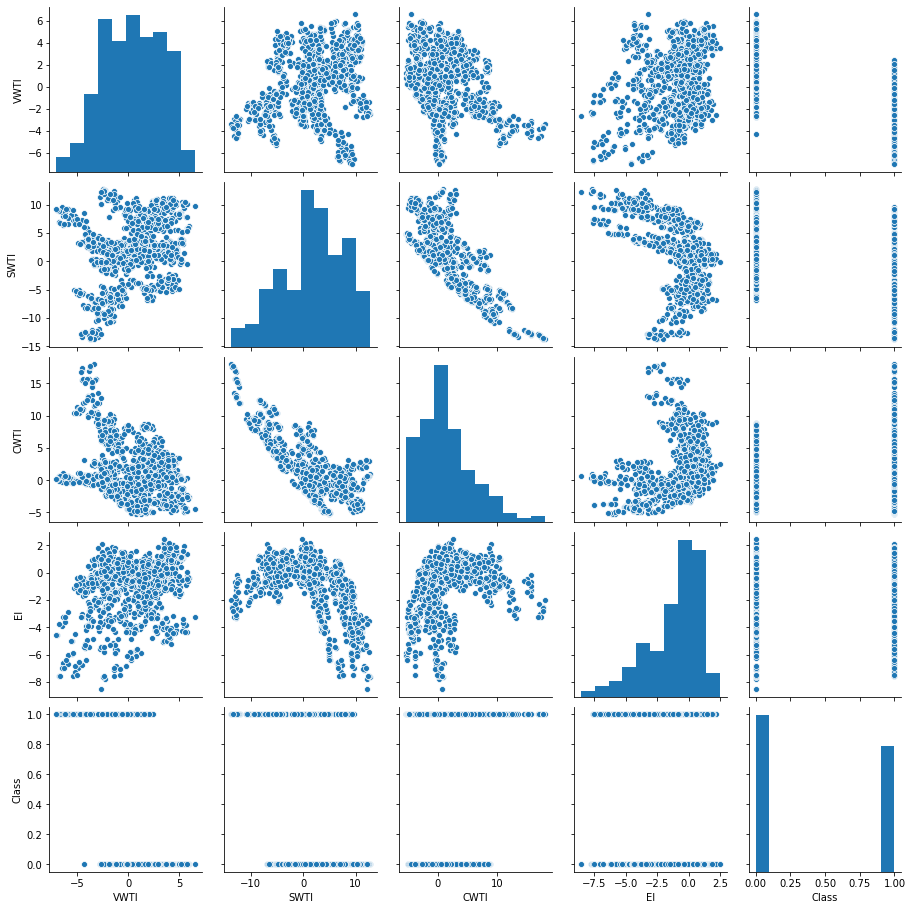

In [ ]:
sns.pairplot(banknote_datadset)

In [ ]:
columnsofinterest = ['VWTI', 'SWTI', 'CWTI', 'EI']
dataset_features = banknote_datadset[columnsofinterest]
dataset_labels = banknote_datadset['Class']

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc_object = rfc(n_estimators=200, random_state=0) 

rfc_object.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predicted_labels = rfc_object.predict(test_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       124
           1       0.99      0.98      0.98        96

    accuracy                           0.99       220
   macro avg       0.99      0.99      0.99       220
weighted avg       0.99      0.99      0.99       220

[[123   1]
 [  2  94]]
0.9863636363636363


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [ ]:
testx = test_data[columnsofinterest]
predictions = rfc_object.predict(testx)

In [ ]:
print(predictions)

[1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0]


In [ ]:
res = pd.DataFrame(predictions) 
res.index = test_data.index 
res.columns = ["prediction"]

In [ ]:
res2 = pd.DataFrame(predictions) 
print(res2)

     0
0    1
1    1
2    0
3    0
4    0
..  ..
270  1
271  0
272  0
273  0
274  0

[275 rows x 1 columns]


In [ ]:
from google.colab import files
res2.to_csv('pred_results.csv')         
files.download('pred_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>